In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
wine_file = "wine_final.csv"

In [7]:
wine_df = pd.read_csv(wine_file, sep=",")

In [8]:
#wine_df.columns

# -= Sorting wine =-

## Sorting by rating

In [9]:
wine_sorted_by_rating = wine_df.groupby("country", as_index=False)["country", "points"].agg(np.mean)

In [10]:
wine_sorted_by_rating = wine_sorted_by_rating.sort_values(by="points", ascending=False)

## Sorting by price

In [11]:
wine_sorted_by_price = wine_df.groupby("country", as_index=False)["country", "price"].agg(np.mean)

In [12]:
wine_sorted_by_price = wine_sorted_by_price.sort_values(by="price", ascending=False)

## Winery sorted by rating

In [13]:
winery_sorted_by_rating = wine_df.groupby("winery", as_index=False)["winery", "points"].agg(np.mean)

In [20]:
winery_sorted_by_rating = winery_sorted_by_rating.sort_values(by="points", ascending=False).head(10)

In [21]:
winery_sorted_by_rating

,winery,points
4514,Clos de Tart,98.000000
624,Araujo,98.000000
7238,Gandona,97.000000
8291,J.L. Chave,97.000000
3015,Château Cheval Blanc,97.000000
2833,Château Angélus,97.000000
11175,Ovid,97.000000
3938,Château d'Yquem,97.000000
14062,Tenuta dell'Ornellaia,96.888889
12832,Salon,96.800000


# -= Graphs =-

## Top wines rating graph

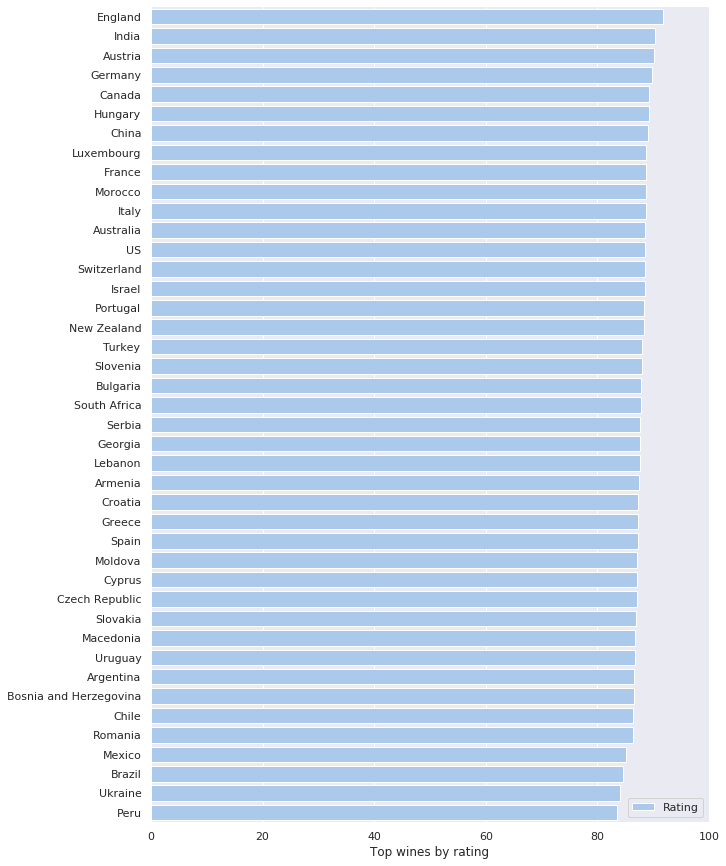

In [15]:
sns.set(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes("pastel")
sns.barplot(x="points", y="country", data=wine_sorted_by_rating, label="Rating", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Top wines by rating")
sns.despine(left=True, bottom=True)

## Top wines price graph

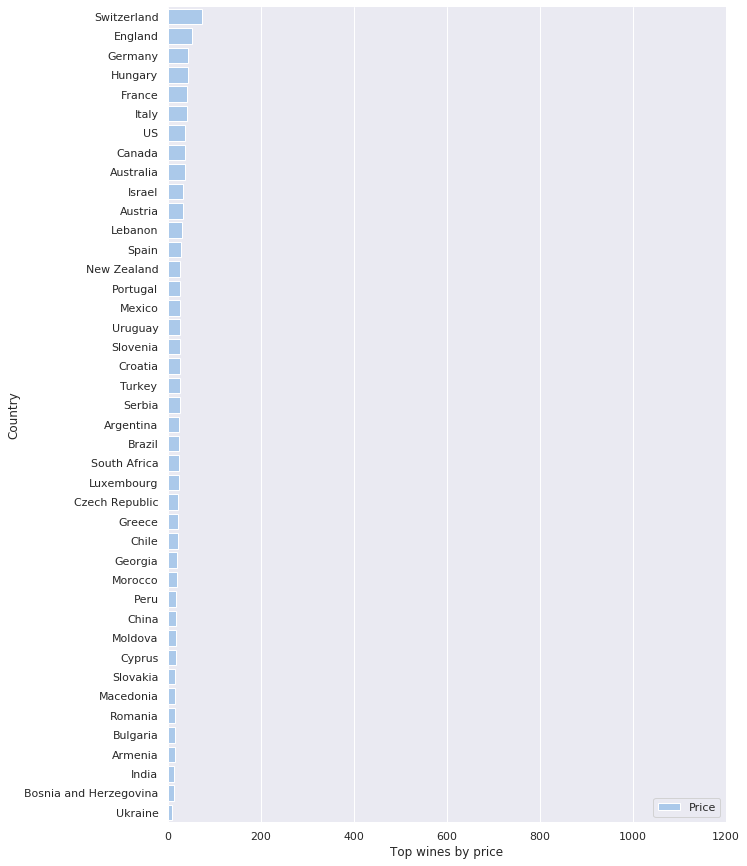

In [16]:
sns.set(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes("pastel")
sns.barplot(x="price", y="country", data=wine_sorted_by_price, label="Price", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1200), ylabel="Country",
       xlabel="Top wines by price")
sns.despine(left=True, bottom=True)

## Top wineries graph

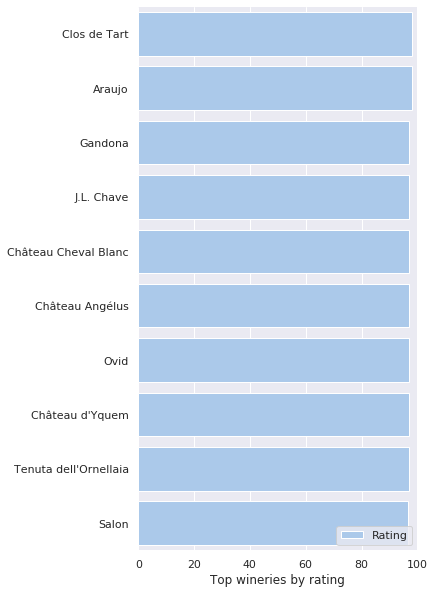

In [25]:
sns.set(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 10))

sns.set_color_codes("pastel")
sns.barplot(x="points", y="winery", data=winery_sorted_by_rating, label="Rating", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Top wineries by rating")
sns.despine(left=True, bottom=True)